## Projeto Integrador - Turma 10 - Data Science - Grupo PIB

Este grupo fez um modelo que possa ajudar as empresas a ter uma melhor direção na decisão de investimentos durante as crises econômicas.

<br>
<img src="PIB.jpg" width='1200' >
<br>

Reunimos os dados de diversas fontes como Fenabrave, Anfavea, ....



# DESAFIO_PIB_DATA_SCIENCE_TURMA_10_2019
# Grupo :
- Alessandro Canova
- Aluizio Margarido
- Mauro Kakazu
- Rabih Kairouz
- Richard Boassi
- Rodrigo Silva

<a id='top'> </a>
# Agenda:
## 1. <a href='#import'> Importar bibliotecas </a>
## 2. <a href='#lerdadoseconomicos'> Leitura dos dados </a>
## 3. <a href='#correlacao'> Calculando a correlaçao de todas as variáveis dos dados economicos </a>
## 4. <a href='#identificandoPairplot'> Identificando o comportamento dos dados economicos entre si por Pairplot </a>
## 5. <a href='#regressaolinear'> Modelo Regressao Linear </a>
## 6. <a href='#lstm'> Modelo Redes Neurais - LSTM </a>

## 7. <a href='#conclusao'> Conclusao </a>

<a id='import'></a>
## 1. Importar Bibliotecas

In [1]:
#Importando as bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import missingno as msno
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

plt.style.use('fivethirtyeight')

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math

warnings.filterwarnings('ignore')

Using TensorFlow backend.


<a href='#top'>voltar ao inicio</a>

<a id='lerdadoseconomicos'></a>
## 2. Leitura dos dados

In [2]:
df_integrador = pd.DataFrame(pd.read_excel('Planilha de dados Economicos_V03.xlsx', sheet_name = 'Econ_Mensal',encoding='latin')) 
df_integrador  = df_integrador[df_integrador.Selic != 0]

df_integrador['Data'] = pd.to_datetime(df_integrador['Data'])
df_integrador.Data=pd.to_datetime(df_integrador.Data, format='%Y-%m')

df_integrador = df_integrador[(df_integrador['Data'] > '1994-12-31') & (df_integrador['Data'] < '2019-12-31') ]

df_integrador.head()

,Data,PROD_TOTAL,PIB_Reais_Milhoes,Sal_Minimo_Real,IPCA_Mensal,Cambio,Desemprego_Taxa,Selic,Divida_Publica
60,1995-01-01,71726.0,47028.6,358.875534,1.700018,0.8451,12.1,3.37,29.35
61,1995-02-01,102750.0,49954.5,355.285724,1.019599,0.8388,12.9,3.25,29.43
62,1995-03-01,123153.0,60024.3,349.620538,1.550350,0.8874,13.2,4.26,28.92
63,1995-04-01,109106.0,57789.5,341.125657,2.430000,0.9055,13.5,4.26,28.67
64,1995-05-01,128367.0,56350.5,477.298179,2.670000,0.8954,13.4,4.25,28.11


In [3]:
df_integrador.describe().T

,count,mean,std,min,25%,50%,75%,max
PROD_TOTAL,300.0,190564.271667,62247.016911,57627.000000,135101.750000,185394.000000,246749.25000,330462.0000
PIB_Reais_Milhoes,300.0,276212.190333,179008.771210,47028.600000,107651.500000,227763.250000,453630.40000,647015.4000
Sal_Minimo_Real,300.0,717.475423,212.692163,341.125657,501.732928,731.573857,941.83906,1039.0000
IPCA_Mensal,300.0,0.550467,0.465661,-0.510000,0.280000,0.465000,0.71000,3.0200
Cambio,300.0,2.278419,0.857644,0.838800,1.749375,2.156100,2.92575,4.2234
Desemprego_Taxa,300.0,15.317393,3.054964,9.000000,13.100000,15.900000,17.70000,20.7000
Selic,300.0,1.278233,0.707379,0.370000,0.820000,1.110000,1.53000,4.2600
Divida_Publica,300.0,41.999533,8.797382,27.950000,32.770000,43.340000,48.31250,62.4500


<a id='correlacao'></a>
## 3. Calculando a correlaçao de todas as variáveis dos dados economicos

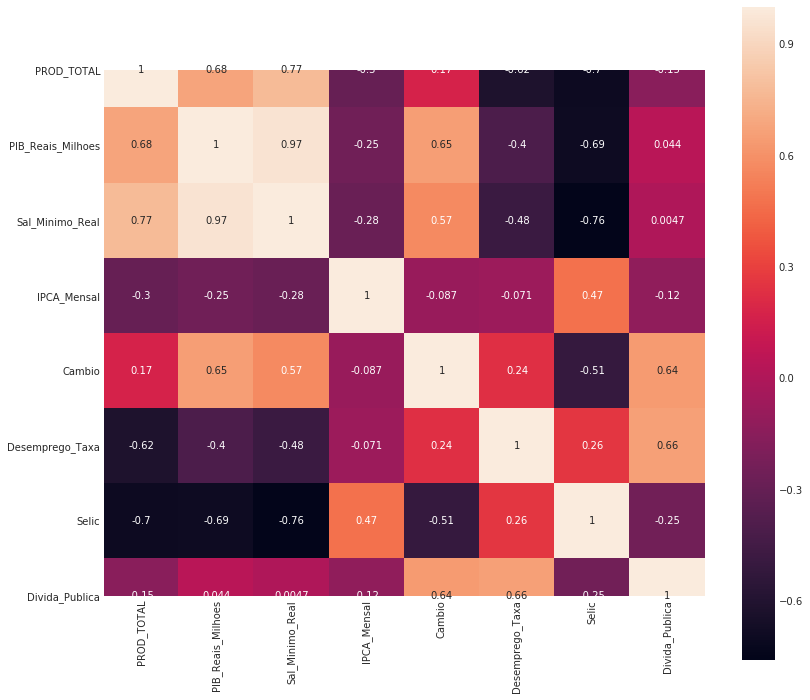

In [4]:
# Plotando a correlação múltipla para os dados com Heatmap

corr = df_integrador.corr()
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(12, 12));
    
    sns.heatmap(
        corr,
        ax=ax,
        annot=True,
        square=True
    );

<a href='#top'>voltar ao inicio</a>

In [5]:
#Criação da fetuare ano de eleição

df_integrador['ano'] = df_integrador['Data'].dt.year
df_integrador['mes'] = df_integrador['Data'].dt.month
aux = [1994+4*i for i in range(297)]
_ = [1 if year in aux else 0 for year in df_integrador.ano]
df_integrador['eleicao'] = _

In [6]:
df_integrador.head()

,Data,PROD_TOTAL,PIB_Reais_Milhoes,Sal_Minimo_Real,IPCA_Mensal,Cambio,Desemprego_Taxa,Selic,Divida_Publica,ano,mes,eleicao
60,1995-01-01,71726.0,47028.6,358.875534,1.700018,0.8451,12.1,3.37,29.35,1995,1,0
61,1995-02-01,102750.0,49954.5,355.285724,1.019599,0.8388,12.9,3.25,29.43,1995,2,0
62,1995-03-01,123153.0,60024.3,349.620538,1.550350,0.8874,13.2,4.26,28.92,1995,3,0
63,1995-04-01,109106.0,57789.5,341.125657,2.430000,0.9055,13.5,4.26,28.67,1995,4,0
64,1995-05-01,128367.0,56350.5,477.298179,2.670000,0.8954,13.4,4.25,28.11,1995,5,0


In [7]:
df_integrador.describe().T

,count,mean,std,min,25%,50%,75%,max
PROD_TOTAL,300.0,190564.271667,62247.016911,57627.000000,135101.750000,185394.000000,246749.25000,330462.0000
PIB_Reais_Milhoes,300.0,276212.190333,179008.771210,47028.600000,107651.500000,227763.250000,453630.40000,647015.4000
Sal_Minimo_Real,300.0,717.475423,212.692163,341.125657,501.732928,731.573857,941.83906,1039.0000
IPCA_Mensal,300.0,0.550467,0.465661,-0.510000,0.280000,0.465000,0.71000,3.0200
Cambio,300.0,2.278419,0.857644,0.838800,1.749375,2.156100,2.92575,4.2234
Desemprego_Taxa,300.0,15.317393,3.054964,9.000000,13.100000,15.900000,17.70000,20.7000
Selic,300.0,1.278233,0.707379,0.370000,0.820000,1.110000,1.53000,4.2600
Divida_Publica,300.0,41.999533,8.797382,27.950000,32.770000,43.340000,48.31250,62.4500
ano,300.0,2007.000000,7.223151,1995.000000,2001.000000,2007.000000,2013.00000,2019.0000
mes,300.0,6.500000,3.457820,1.000000,3.750000,6.500000,9.25000,12.0000


<a href='#top'>voltar ao inicio</a>

<a id='identificandoPairplot'></a>
## 4. Identificando o comportamento de todas as variáveis 

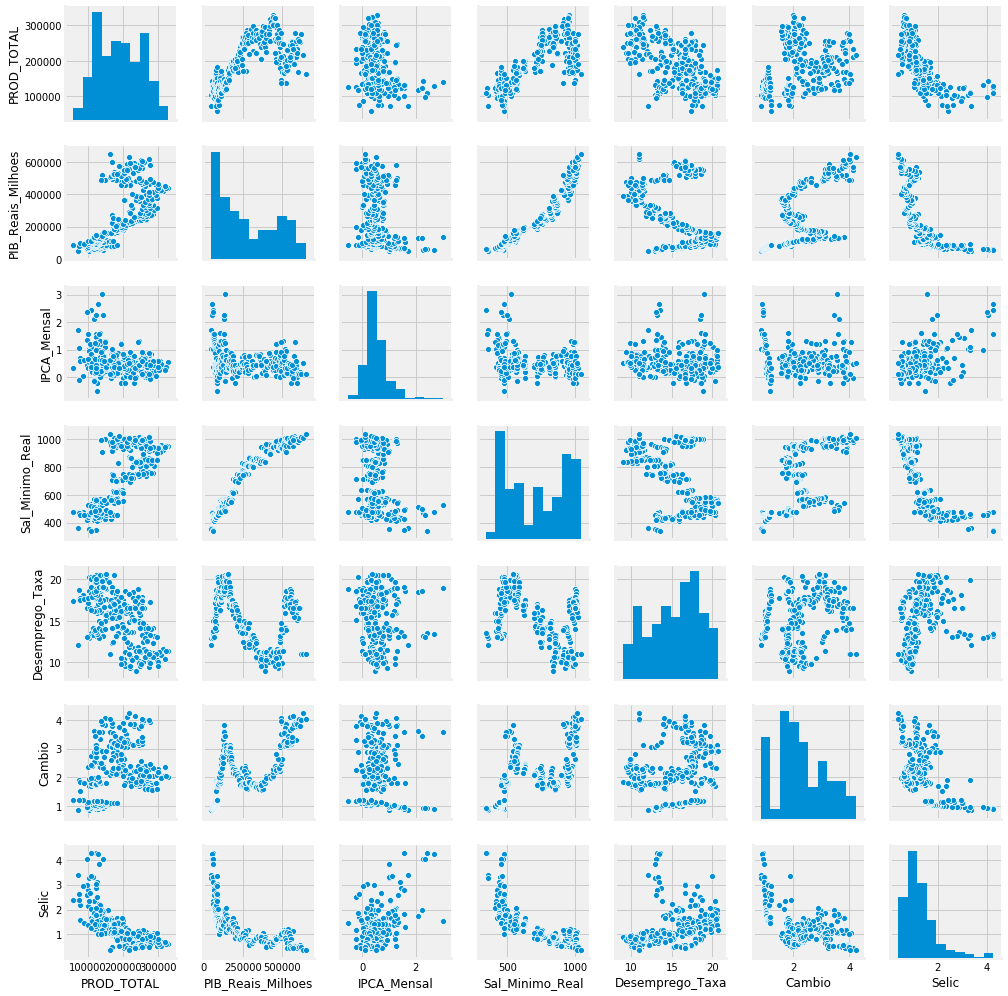

In [8]:
sns.pairplot(data=df_integrador.fillna(0), \
             vars=["PROD_TOTAL", "PIB_Reais_Milhoes", \
                                                 "IPCA_Mensal", "Sal_Minimo_Real", \
                                                 "Desemprego_Taxa", "Cambio", \
                                                 "Selic"], size=2);

<a href='#top'>voltar ao inicio</a>

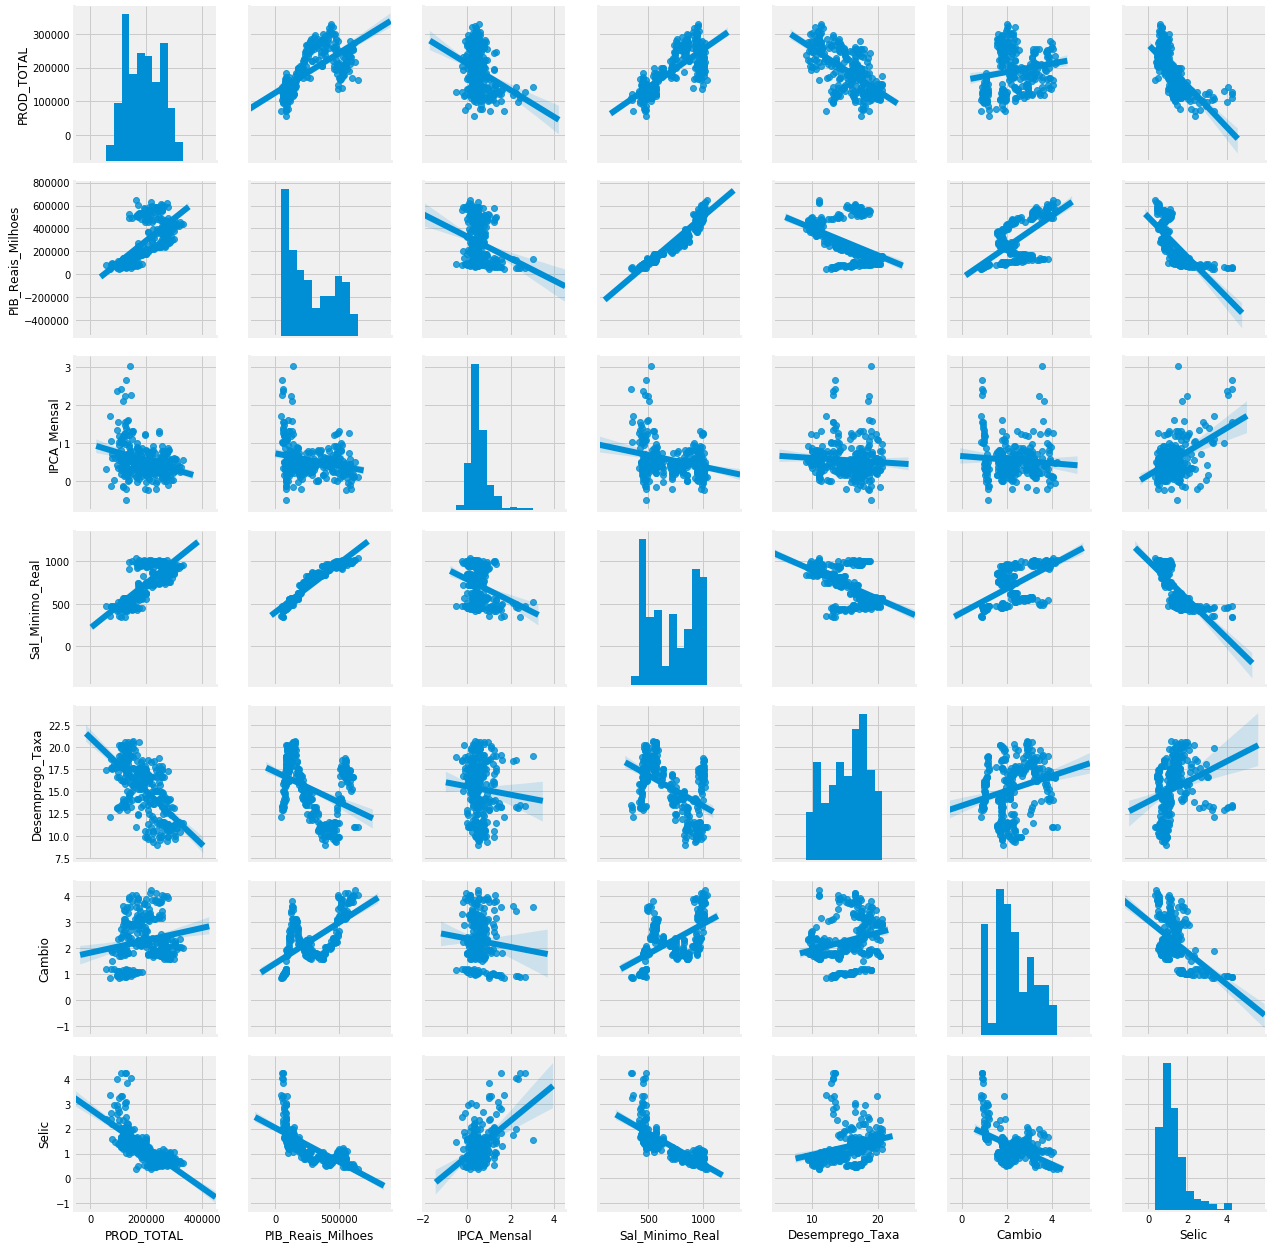

In [9]:
sns.color_palette("muted")
sns.pairplot(data=df_integrador.fillna(0), vars=["PROD_TOTAL", "PIB_Reais_Milhoes", \
                                                 "IPCA_Mensal", "Sal_Minimo_Real", \
                                                 "Desemprego_Taxa", "Cambio", \
                                                 "Selic"],  kind="reg");

### Relação entre PIB e Produção de Veículos

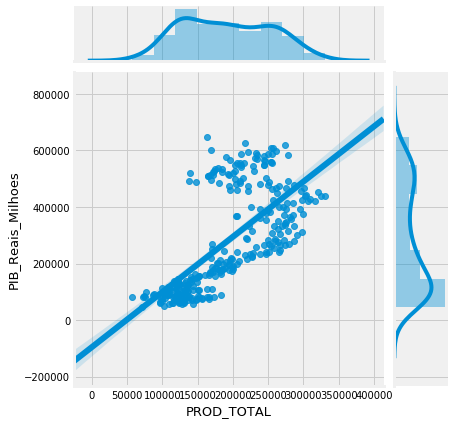

In [10]:
sns.jointplot(x="PROD_TOTAL", y="PIB_Reais_Milhoes", data=df_integrador, kind='reg') 
plt.ylabel('PIB_Reais_Milhoes', fontsize=13)
plt.xlabel('PROD_TOTAL', fontsize=13)
plt.show()

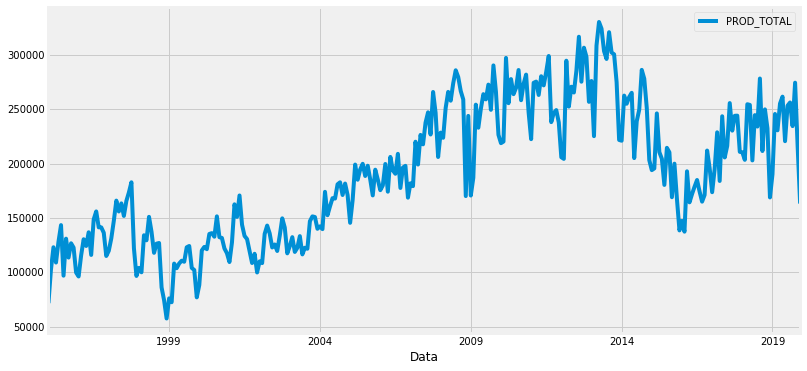

In [11]:
dados_pivot = (df_integrador.pivot_table(index='Data', values=['PROD_TOTAL'], aggfunc='sum'))
dados_pivot.head()
dados_pivot.plot(kind='line', stacked=True, figsize=(12, 6))
plt.show()

In [12]:
list(df_integrador.columns)

['Data',
 'PROD_TOTAL',
 'PIB_Reais_Milhoes',
 'Sal_Minimo_Real',
 'IPCA_Mensal',
 'Cambio',
 'Desemprego_Taxa',
 'Selic',
 'Divida_Publica',
 'ano',
 'mes',
 'eleicao']

<a id='regressaolinear'></a>
## 5. Modelo Regressao Linear

In [13]:
def run_regression(df_integrador,function):
    model = smf.ols(function, df_integrador).fit()
    print(model.summary())
    return model

run_regression(df_integrador,\
               'PROD_TOTAL ~ PIB_Reais_Milhoes + Sal_Minimo_Real + IPCA_Mensal + Cambio + Desemprego_Taxa + Selic + Divida_Publica')

                            OLS Regression Results                            
Dep. Variable:             PROD_TOTAL   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     147.5
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           5.74e-92
Time:                        18:56:02   Log-Likelihood:                -3510.0
No. Observations:                 300   AIC:                             7036.
Df Residuals:                     292   BIC:                             7066.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.454e+05   2.97e+0

In [14]:
PIB = 619775.4 #PIB Milhoes 
TD = 11.03333333 #Taxa Desemprego 
SE = 0.48 #Taxa Selic %
IPCA = 0.1  #IPCA
SM = 1017.560333 #Salario Minimo
CA = 4.0035  #Cambio
DP = 54.17 #Divida Publica


P_TOTAL = 1.454e+05 -0.0264*PIB + 228.4562*SM -382.1416*IPCA -3.246e+04*CA -5213.3733*TD -2.279e+04*SE+1707.5125*DP

P_REAL = 274583

print('PRODUCAO REAL OUTUBRO 2019 = ', round(P_REAL,0))

print('PRODUCAO MODELO OUTUBRO 2019 = ', round(P_TOTAL,0))

PRODUCAO REAL OUTUBRO 2019 =  274583
PRODUCAO MODELO OUTUBRO 2019 =  255550.0


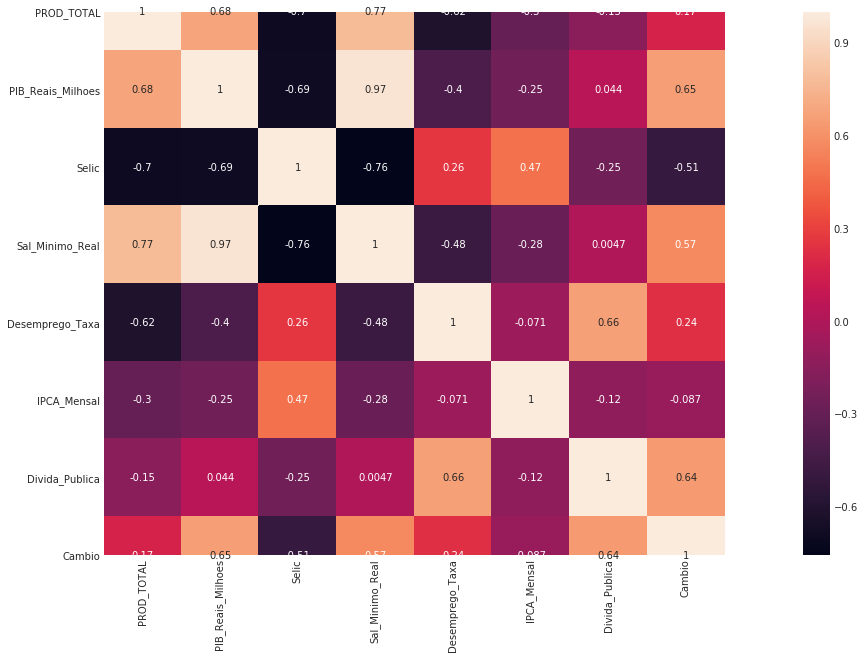

In [15]:
df_integrador_AUX = df_integrador[["Data", "PROD_TOTAL","PIB_Reais_Milhoes", "Selic", "Sal_Minimo_Real",
                                  "Desemprego_Taxa", "IPCA_Mensal", "Divida_Publica", "Cambio"]]

corr_modelo = df_integrador_AUX.corr()

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(25, 10));
    
    sns.heatmap(
        corr_modelo,
        ax=ax,
        annot=True,
        square=True
    );
                  

In [16]:
df_integrador_AUX.corr()

,PROD_TOTAL,PIB_Reais_Milhoes,Selic,Sal_Minimo_Real,Desemprego_Taxa,IPCA_Mensal,Divida_Publica,Cambio
PROD_TOTAL,1.000000,0.679077,-0.699479,0.773684,-0.618778,-0.295804,-0.147593,0.173306
PIB_Reais_Milhoes,0.679077,1.000000,-0.692520,0.965580,-0.402677,-0.249261,0.043776,0.653666
Selic,-0.699479,-0.692520,1.000000,-0.757001,0.263460,0.472643,-0.247391,-0.505913
Sal_Minimo_Real,0.773684,0.965580,-0.757001,1.000000,-0.484681,-0.278481,0.004725,0.571420
Desemprego_Taxa,-0.618778,-0.402677,0.263460,-0.484681,1.000000,-0.071424,0.659724,0.237761
IPCA_Mensal,-0.295804,-0.249261,0.472643,-0.278481,-0.071424,1.000000,-0.122011,-0.087366
Divida_Publica,-0.147593,0.043776,-0.247391,0.004725,0.659724,-0.122011,1.000000,0.636993
Cambio,0.173306,0.653666,-0.505913,0.571420,0.237761,-0.087366,0.636993,1.000000


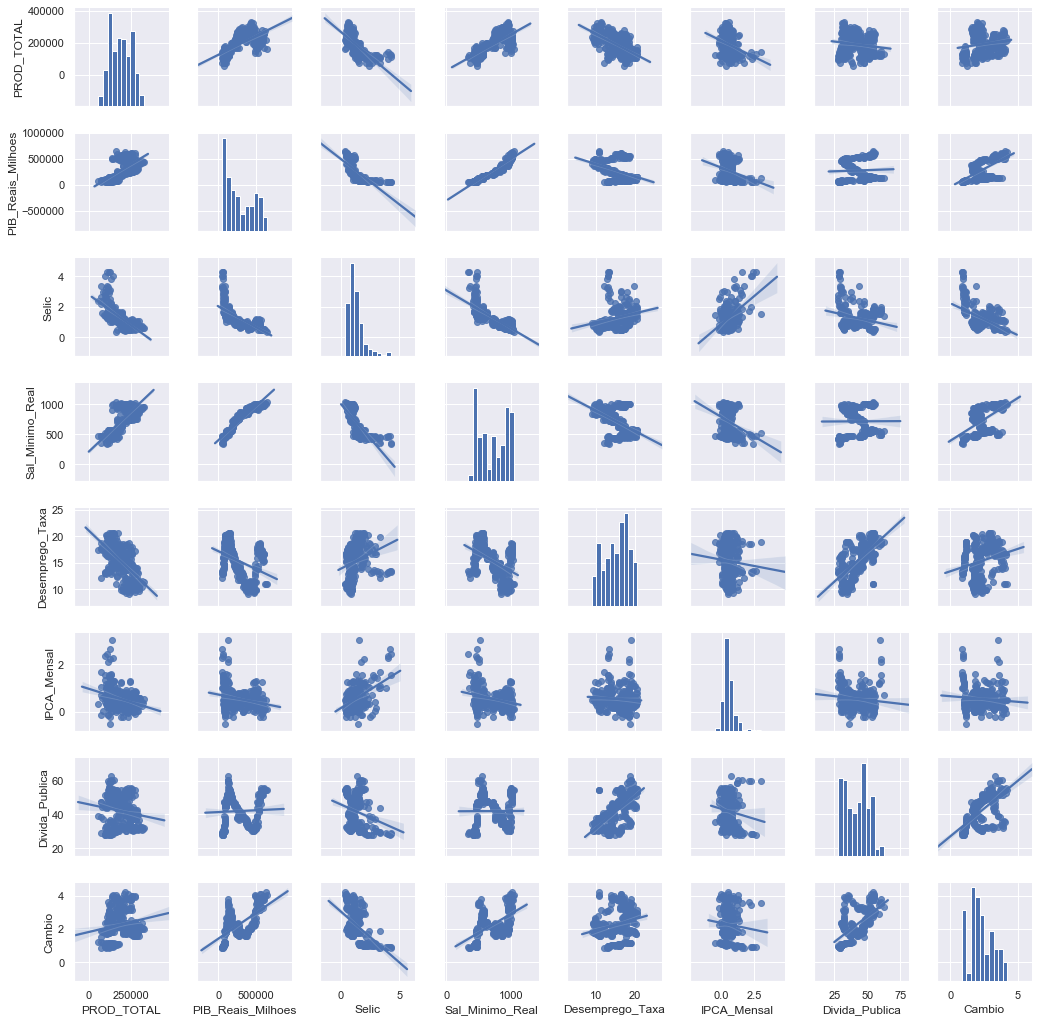

In [17]:
plt.style.use('fivethirtyeight')
sns.set(style="darkgrid", color_codes=True)
sns.pairplot(data=df_integrador_AUX .fillna(0), palette="husl", size=1.8, kind="reg");

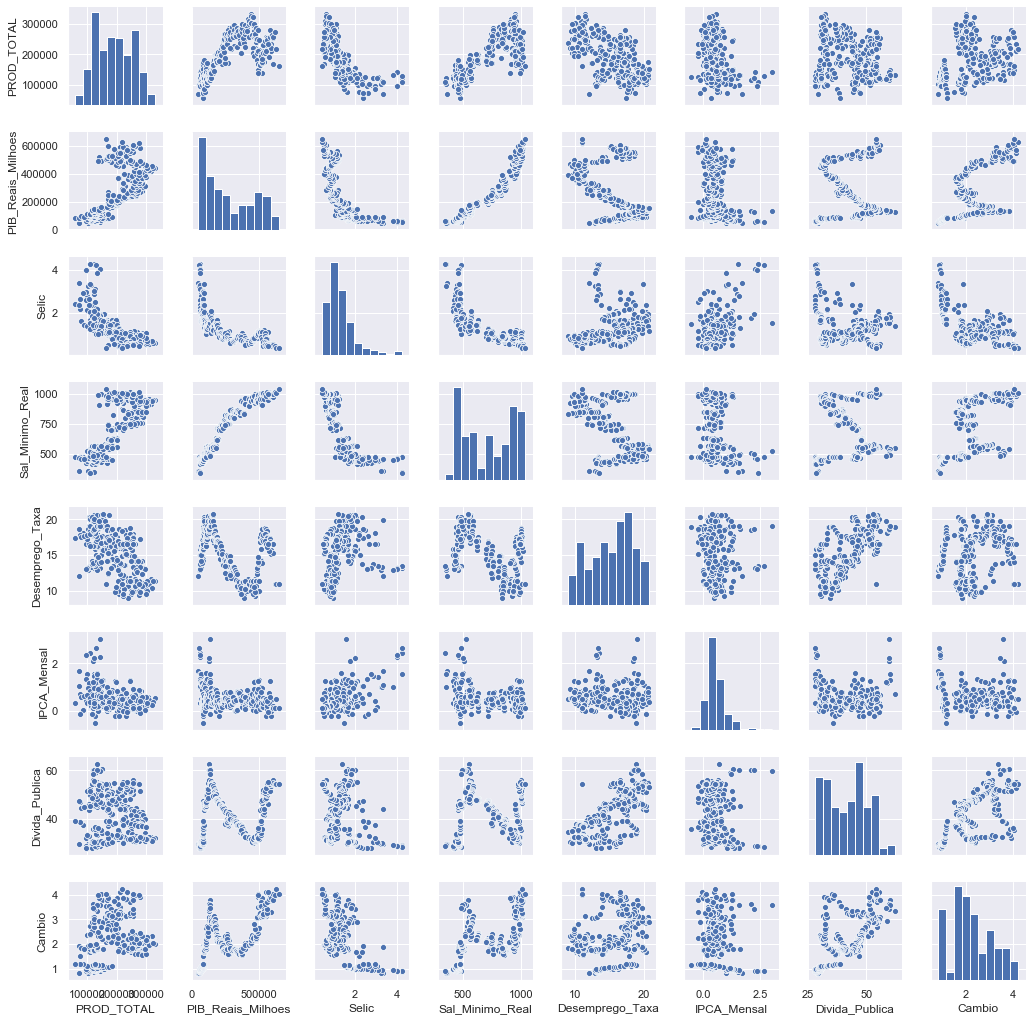

In [18]:
plt.style.use('fivethirtyeight')
sns.set(style="darkgrid", color_codes=True)
sns.pairplot(data=df_integrador_AUX.fillna(0), palette="husl", size=1.8);

In [19]:
PIB = df_integrador_AUX.PIB_Reais_Milhoes #PIB Milhoes
TD = df_integrador_AUX.Desemprego_Taxa #Taxa Desemprego %
SE = df_integrador_AUX.Selic #Taxa Selic %
SM = df_integrador_AUX.Sal_Minimo_Real #Salario Minimo
IPCA = df_integrador_AUX.IPCA_Mensal
CA = df_integrador_AUX.Cambio
DP = df_integrador_AUX.Divida_Publica

df_integrador_AUX['MODELO_PROD'] = (1.454e+05 -0.0264*PIB + 228.4562*SM -382.1416*IPCA -3.246e+04*CA -5213.3733*TD -2.279e+04*SE+1707.5125*DP).round()
df_integrador_AUX['MEDIA'] = (df_integrador_AUX['MODELO_PROD'] + df_integrador_AUX['PROD_TOTAL'])/2

df_integrador_AUX.tail()

,Data,PROD_TOTAL,PIB_Reais_Milhoes,Selic,Sal_Minimo_Real,Desemprego_Taxa,IPCA_Mensal,Divida_Publica,Cambio,MODELO_PROD,MEDIA
355,2019-08-01,256360.0,608014.9,0.50,997.500606,16.6,0.11,54.84,4.019382,222425.0,239392.5
356,2019-09-01,234636.0,570176.4,0.46,998.000000,16.6,-0.04,55.34,4.120900,222066.0,228351.0
357,2019-10-01,274583.0,619775.4,0.48,1017.560333,11.0,0.10,54.17,4.003500,255724.0,265153.5
358,2019-11-01,216645.0,628289.6,0.38,1012.094689,11.0,0.51,54.35,4.223400,249542.0,233093.5
359,2019-12-01,163338.0,647015.4,0.37,1039.000000,11.0,0.11,54.24,4.030100,261662.0,212500.0


In [20]:
dados_pivot = df_integrador_AUX[['Data', 'PROD_TOTAL', 'MODELO_PROD', 'MEDIA']]
dados_pivot_PROD = (dados_pivot.pivot_table(index='Data', values=dados_pivot, aggfunc='sum'))

dados_pivot_PROD.tail()

,MEDIA,MODELO_PROD,PROD_TOTAL
Data,,,
2019-08-01,239392.5,222425.0,256360.0
2019-09-01,228351.0,222066.0,234636.0
2019-10-01,265153.5,255724.0,274583.0
2019-11-01,233093.5,249542.0,216645.0
2019-12-01,212500.0,261662.0,163338.0


In [21]:
dados_pivot_PROD.to_excel("REGRESSOR_LOGISTICO.xlsx")

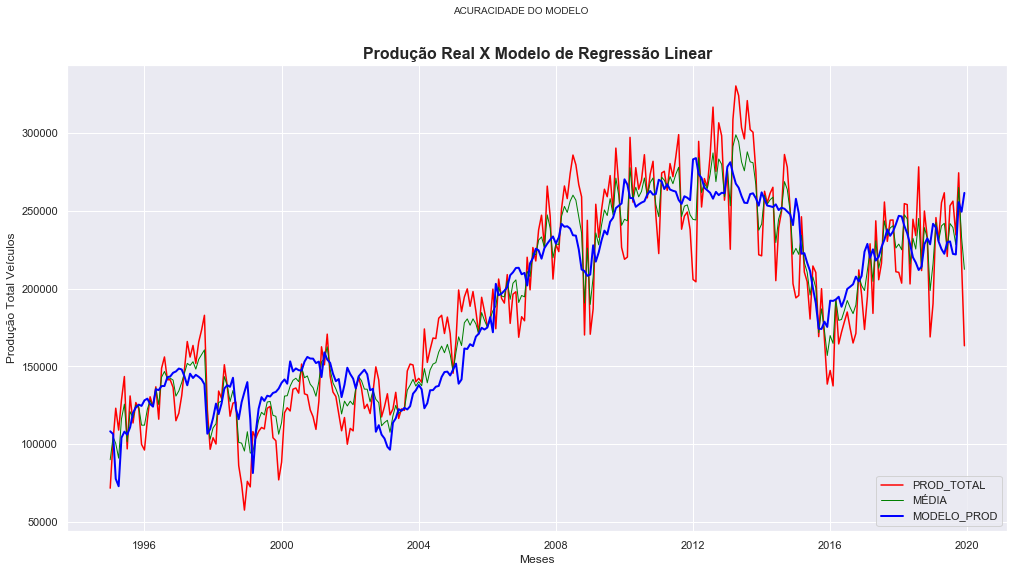

In [22]:
plt.figure(num = 5, figsize=(15, 8))

plt.plot(dados_pivot_PROD.PROD_TOTAL, label="PROD_TOTAL", color="red", 
         markeredgecolor = 'r', markerfacecolor = 'r')
plt.plot(dados_pivot_PROD.MEDIA, label="MÉDIA", color="green", linewidth = 1)
plt.plot(dados_pivot_PROD.MODELO_PROD, label="MODELO_PROD", color="blue", linewidth = 2)

plt.legend(loc='lower right')

plt.title("Produção Real X Modelo de Regressão Linear", fontsize=16, fontweight='bold')
plt.suptitle("ACURACIDADE DO MODELO", fontsize=10)
plt.xlabel("Meses")
plt.ylabel("Produção Total Veículos")

plt.show()

In [23]:
import math
print('RMSE:', math.sqrt(mean_squared_error(dados_pivot_PROD.PROD_TOTAL, dados_pivot_PROD.MODELO_PROD).round(2)))
print('r2_score:',r2_score(dados_pivot_PROD.PROD_TOTAL, dados_pivot_PROD.MODELO_PROD).round(4))
print('Erro Absoluto Médio:',mean_absolute_error(dados_pivot_PROD.PROD_TOTAL, \
                                                 dados_pivot_PROD.MODELO_PROD).round(2))

RMSE: 29177.870409438725
r2_score: 0.7795
Erro Absoluto Médio: 23580.36


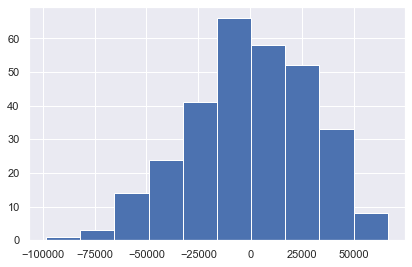

In [24]:
#Distribuição dos Erros

y = dados_pivot_PROD.PROD_TOTAL
y_predicted = dados_pivot_PROD.MODELO_PROD

plt.hist(y - y_predicted, bins=10)
plt.show()

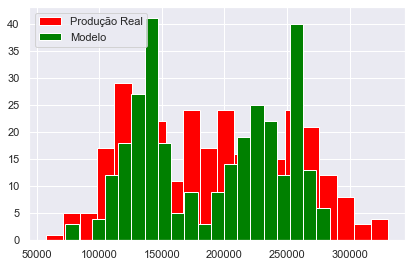

In [25]:
df_integrador_AUX.PROD_TOTAL.hist(bins=20, color = 'red', label='Produção Real')
df_integrador_AUX.MODELO_PROD.hist(bins=20, color='green', label='Modelo')

plt.legend(loc= 2)

<a id='lstm'></a>
## 6. Modelo Redes Neurais - LSTM

# Aplicando LSTM

In [26]:
from math import sqrt
from numpy import concatenate
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import read_excel
import pandas as pd
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU, Bidirectional
from keras.layers import LSTM

In [27]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
def plot_predictions(test,predicted):
    plt.figure(num = 5, figsize=(15, 6))
    plt.plot(test, color='red',label='Producao Real de Veículos')
    plt.plot(predicted, color='blue',label='Producao Prevista de Veículos')
    plt.title('Predicao da Producao de Veículos')
    plt.xlabel('Data')
    plt.ylabel('Producao de Veiculos')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("Erro Médio Quadrado é {}.".format(rmse))

In [28]:
from pandas import read_csv
from datetime import datetime
# load data
def parse(x):
	return datetime.strptime(x, '%Y %m %d %H')

In [29]:
dataset = pd.read_excel('Planilha de dados Economicos_V03.xlsx',\
                     encoding='latin', \
                     index_col='Data', parse_dates=['Data'])

dataset = dataset.loc[dataset.index > '1994-12-31']


# manually specify column names
dataset.columns = ['PROD_TOTAL', 'PIB_Reais_Milhoes', 'Sal_Minimo_Real', 'IPCA_Mensal', 'Cambio', 'Desemprego_Taxa', 'Selic', 'Divida_Publica']
dataset.index.name = 'Data'
# mark all NA values with 0
dataset['PROD_TOTAL'].fillna(0, inplace=True)
# summarize first 5 rows
print(dataset.head(5))
print(dataset.tail(5))

            PROD_TOTAL  PIB_Reais_Milhoes  Sal_Minimo_Real  IPCA_Mensal  \
Data                                                                      
1995-01-01     71726.0            47028.6       358.875534     1.700018   
1995-02-01    102750.0            49954.5       355.285724     1.019599   
1995-03-01    123153.0            60024.3       349.620538     1.550350   
1995-04-01    109106.0            57789.5       341.125657     2.430000   
1995-05-01    128367.0            56350.5       477.298179     2.670000   

            Cambio  Desemprego_Taxa  Selic  Divida_Publica  
Data                                                        
1995-01-01  0.8451             12.1   3.37           29.35  
1995-02-01  0.8388             12.9   3.25           29.43  
1995-03-01  0.8874             13.2   4.26           28.92  
1995-04-01  0.9055             13.5   4.26           28.67  
1995-05-01  0.8954             13.4   4.25           28.11  
             PROD_TOTAL  PIB_Reais_Milhoes  Sal

In [30]:
values = dataset.values
values.shape

(324, 8)

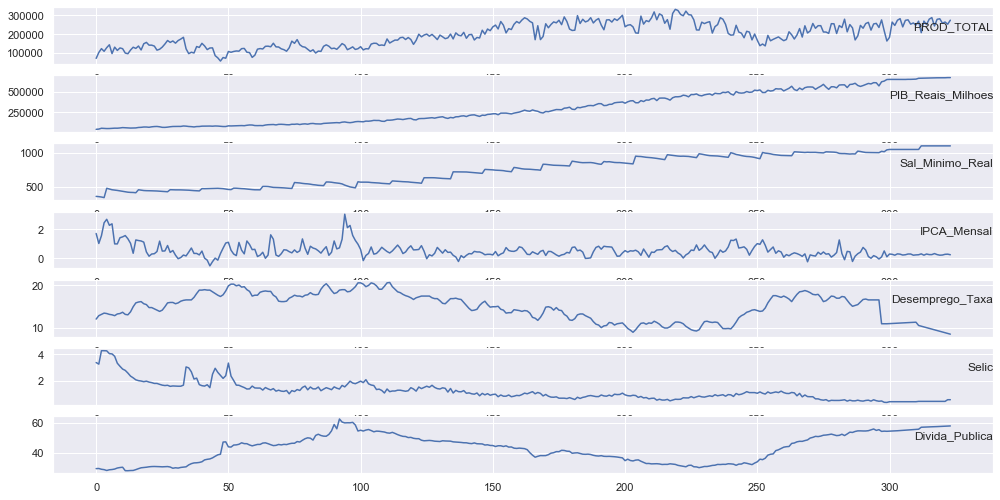

In [31]:
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
pyplot.figure(num = 5, figsize=(15, 8))
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [32]:
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.051676   0.000000   0.023475   0.626067   0.003257   0.291598   
2   0.165386   0.004696   0.018727   0.433314   0.000000   0.357496   
3   0.240167   0.020856   0.011235   0.583669   0.006515   0.382208   
4   0.188682   0.017270   0.000000   0.832861   0.013029   0.406919   
5   0.259278   0.014960   0.180093   0.900850   0.009772   0.398682   

   var7(t-1)  var8(t-1)   var1(t)  
1   0.771208   0.040580  0.165386  
2   0.740360   0.042899  0.240167  
3   1.000000   0.028116  0.188682  
4   1.000000   0.020870  0.259278  
5   0.997429   0.004638  0.314857  


(270, 1, 8) (270,) (53, 1, 8) (53,)
Train on 270 samples, validate on 53 samples
Epoch 1/50
 - 1s - loss: 0.3942 - val_loss: 0.4916
Epoch 2/50
 - 0s - loss: 0.2853 - val_loss: 0.3680
Epoch 3/50
 - 0s - loss: 0.2257 - val_loss: 0.2749
Epoch 4/50
 - 0s - loss: 0.1955 - val_loss: 0.2136
Epoch 5/50
 - 0s - loss: 0.1820 - val_loss: 0.1709
Epoch 6/50
 - 0s - loss: 0.1728 - val_loss: 0.1426
Epoch 7/50
 - 0s - loss: 0.1648 - val_loss: 0.1216
Epoch 8/50
 - 0s - loss: 0.1578 - val_loss: 0.1067
Epoch 9/50
 - 0s - loss: 0.1523 - val_loss: 0.1019
Epoch 10/50
 - 0s - loss: 0.1468 - val_loss: 0.0965
Epoch 11/50
 - 0s - loss: 0.1419 - val_loss: 0.0927
Epoch 12/50
 - 0s - loss: 0.1366 - val_loss: 0.0887
Epoch 13/50
 - 0s - loss: 0.1315 - val_loss: 0.0861
Epoch 14/50
 - 0s - loss: 0.1268 - val_loss: 0.0831
Epoch 15/50
 - 0s - loss: 0.1226 - val_loss: 0.0813
Epoch 16/50
 - 0s - loss: 0.1185 - val_loss: 0.0807
Epoch 17/50
 - 0s - loss: 0.1142 - val_loss: 0.0806
Epoch 18/50
 - 0s - loss: 0.1103 - val_loss:

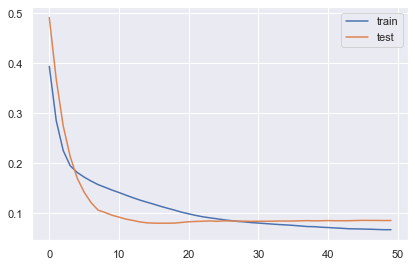

In [33]:
# split into train and test sets
values = reframed.values
n_train = 270
train = values[:n_train, :]
test = values[n_train:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# design network
model = Sequential()
model.add(Bidirectional(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]))))
model.add(Dense(1))
model.compile(loss='mae', lr=0.4, optimizer='rmsprop')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [34]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [35]:
print('yhat_shape', yhat.shape)
print('test_X', test_X.shape)
print('test_y', test_y.shape)

yhat_shape (53, 1)
test_X (53, 8)
test_y (53,)


In [36]:
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat.shape

(53, 8)

In [37]:
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat.shape

(53, 8)

In [38]:
inv_yhat = inv_yhat[:,0]
inv_yhat.shape

(53,)

In [39]:
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 28291.082


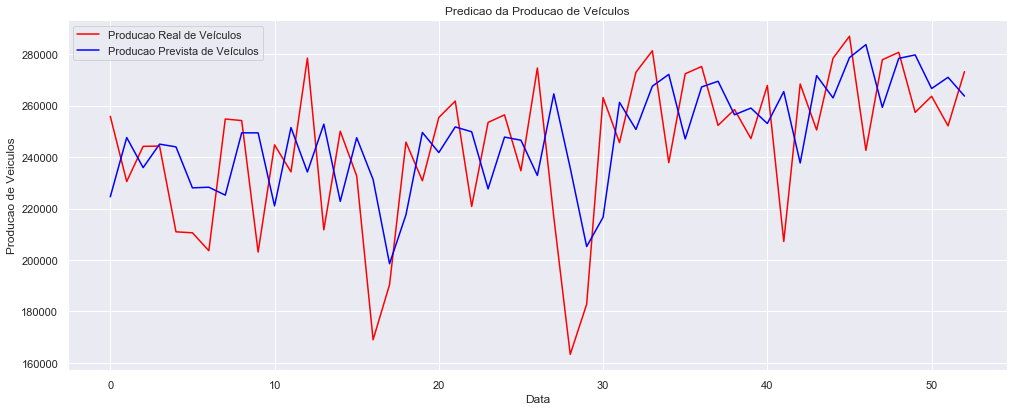

In [40]:
plot_predictions(inv_y, inv_yhat)

In [41]:
numpy_data = np.array(inv_y)
df_inv_y = pd.DataFrame(data=numpy_data, columns=["Producao_Real"])

In [42]:
numpy_data_1 = np.array(inv_yhat)
df_inv_yhat = pd.DataFrame(data=numpy_data_1, columns=["Producao_Prevista"])
df_inv_yhat.head()

,Producao_Prevista
0,224540.203125
1,247557.062500
2,235875.265625
3,244996.218750
4,243934.734375


In [43]:
df_inv_yhat.drop(df_inv_yhat.index[:1], inplace=True)
df_inv_yhat.reset_index(inplace = True)

In [44]:
frames = [df_inv_y, df_inv_yhat]

In [45]:
df_inv_yhat.reset_index(drop=True)
del df_inv_yhat['index']
df_inv_yhat.head()

,Producao_Prevista
0,247557.062500
1,235875.265625
2,244996.218750
3,243934.734375
4,228023.937500


In [46]:
df_inv_y.drop(df_inv_y.tail(1).index,inplace=True)

In [47]:
df_inv_y.head()

,Producao_Real
0,255809.000000
1,230477.015625
2,244137.000000
3,244242.000000
4,210939.015625


In [48]:
result = pd.concat([df_inv_y, df_inv_yhat], axis=1, sort=False)
result.head()

,Producao_Real,Producao_Prevista
0,255809.000000,247557.062500
1,230477.015625,235875.265625
2,244137.000000,244996.218750
3,244242.000000,243934.734375
4,210939.015625,228023.937500


In [49]:
result.to_excel("results_LSTM.xlsx")

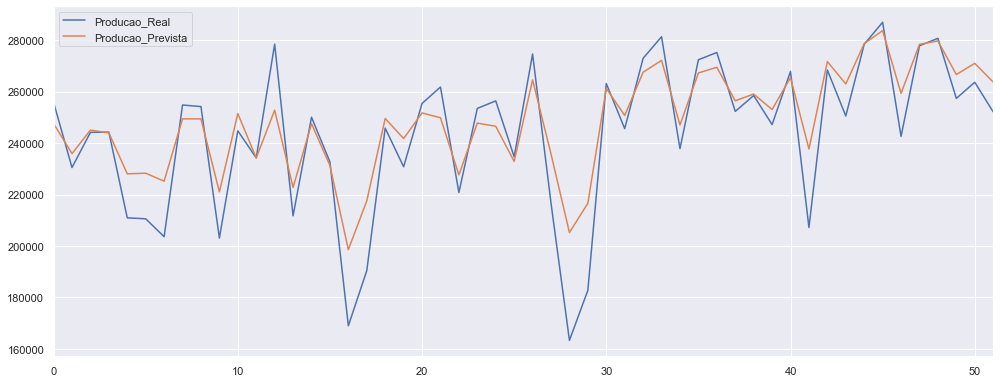

In [50]:
result.plot(figsize=(15, 6));

In [51]:
print('RMSE:', math.sqrt(mean_squared_error(result.Producao_Real, result.Producao_Prevista).round(2)))
print('Erro Absoluto Médio:',mean_absolute_error(result.Producao_Real, result.Producao_Prevista).round(2))

RMSE: 13743.612334462872
Erro Absoluto Médio: 9872.78


<a id='conclusao'></a>
## 7. Conclusao

### Com os resultados apresentados pelos modelos utilizados, podemos concluir que o melhor modelo é o de redes neurais - LSTM. Devido ao seu RMSE e Erro Absoluto serem menores que o modelo de regressao linear.

### Em um projeto automotivo totalmente novo (modelo novo de veiculo), o modelo LSTM definido aqui neste trabalho, poderia economizar um investimento anual de aprox. de 68 Milhoes de Reais.